In [ ]:
Author:

In [1]:
import networkx as nx
import numpy as np
import math
from tqdm import tqdm

In [2]:
def divisorGen(n):
    large_divisors = []
    for i in range(1, n+1):
        if n % i == 0:
            yield i
            

def log_number_spanning_tree(G):
    spectrum = nx.laplacian_spectrum(G)
    non_zero_spect = np.delete(spectrum, 0)

    return np.sum(np.log(non_zero_spect))

In [99]:
sqrt_n = 36
n = sqrt_n**2


rectangle_compactness = []
for k in tqdm(divisorGen(n)):
    if n != sqrt_n:
        G = nx.grid_2d_graph(k, int(n/k))
        rectangle_compactness.append( (log_number_spanning_tree(G),(k, int(n/k)) ) ) 

rectangle_compactness

25it [00:08,  3.11it/s]


[(7.167037877044891, (1, 1296)),
 (859.3133017593507, (2, 648)),
 (1097.4643449254295, (3, 432)),
 (1208.382063067321, (4, 324)),
 (1313.4776991930412, (6, 216)),
 (1363.3036527063937, (8, 162)),
 (1379.3433521500929, (9, 144)),
 (1410.120368765693, (12, 108)),
 (1431.2798798545123, (16, 81)),
 (1437.6689257726775, (18, 72)),
 (1448.5598980874413, (24, 54)),
 (1451.2687729353925, (27, 48)),
 (1453.9708443402724, (36, 36)),
 (1451.268772935392, (48, 27)),
 (1448.5598980874433, (54, 24)),
 (1437.668925772677, (72, 18)),
 (1431.2798798545102, (81, 16)),
 (1410.1203687656885, (108, 12)),
 (1379.3433521501033, (144, 9)),
 (1363.3036527064, (162, 8)),
 (1313.4776991930657, (216, 6)),
 (1208.3820630672913, (324, 4)),
 (1097.464344925423, (432, 3)),
 (859.3133017592672, (648, 2)),
 (7.167037877044891, (1296, 1))]

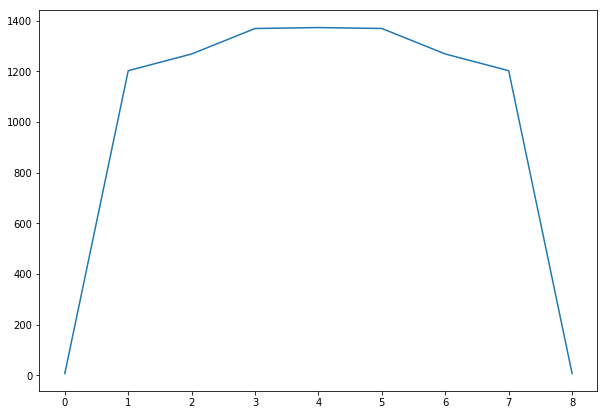

In [98]:
import matplotlib.pyplot as plt

rectangles = [rectangle_compactness[i][0] for i in range(len(rectangle_compactness))]

plt.figure(figsize=(10,7))
plt.plot(rectangles)
plt.show()

In [55]:
import subgraph_sampler as ss

space = 20
k = 10
n = k**2

G = nx.grid_2d_graph(space,space)
I = nx.grid_2d_graph(k,k)


tree_compactness = [(log_number_spanning_tree(I), dict())]
sample_size = 1000
for i in tqdm(range(sample_size)):
    H = ss.connected_subgraph_sampler(G, size=n)
    dic = {}
    for node in G.nodes:
        if node in H.nodes:
            dic[node] = 1
        else:
            dic[node] = 0
        
    tree_compactness.append((log_number_spanning_tree(H), dic))

100%|██████████| 1000/1000 [00:06<00:00, 147.74it/s]


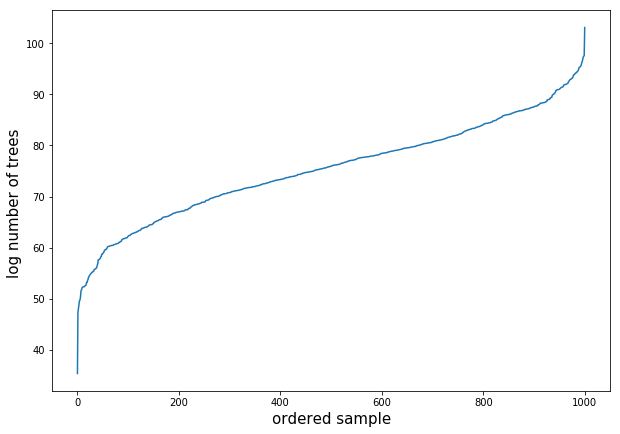

In [80]:
tree_compact = [tree_compactness[i][0] for i in range(len(tree_compactness))]

plt.figure(figsize=(10,7))
plt.plot(sorted(tree_compact))
plt.ylabel("log number of trees ", fontsize = 15)
plt.xlabel("ordered sample", fontsize = 15)
plt.show()

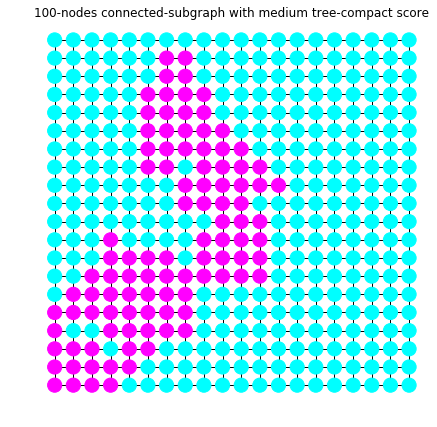

In [93]:
pos = {i:i for i in G.nodes}

subset = sorted(tree_compactness, key = lambda x: x[0], reverse= True)
color_dict = subset[-504][1]

values = [color_dict[i] for i in G.nodes]

plt.figure(figsize=(7,7))
plt.title("100-nodes connected-subgraph with medium tree-compact score")
nx.draw(G, node_color = values, cmap="cool", pos = pos, node_size=200)

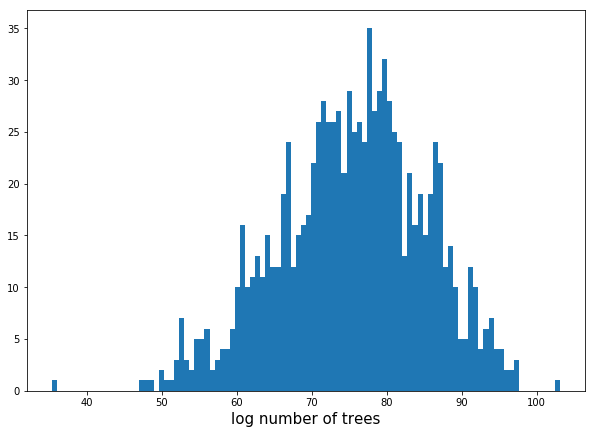

In [100]:
plt.figure(figsize=(10,7))
plt.xlabel("log number of trees", fontsize = 15)

plt.hist(tree_compact, bins = 100)
plt.show()

In [101]:
max(tree_compactness) == tree_compactness[0]

True

In [102]:
max(tree_compactness)

(103.05321310362568, {})